In [9]:
import numpy as np 
import pandas as pd 

from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

import re

In [10]:
data = pd.read_csv('Finance_data.csv')
data.head()

,Sentence,Sentiment
0,The GeoSolutions technology will leverage Bene...,positive
1,"$ESI on lows, down $1.50 to $2.50 BK a real po...",negative
2,"For the last quarter of 2010 , Componenta 's n...",positive
3,According to the Finnish-Russian Chamber of Co...,neutral
4,The Swedish buyout firm has sold its remaining...,neutral


In [11]:
data.Sentiment.value_counts()

neutral     3130
positive    1852
negative     860
Name: Sentiment, dtype: int64

In [12]:
num_of_categories = 2000

shuffled = data.reindex(np.random.permutation(data.index))
neutral = shuffled[shuffled['Sentiment'] == 'neutral'][:num_of_categories]
positive = shuffled[shuffled['Sentiment'] == 'positive'][:num_of_categories]
negative = shuffled[shuffled['Sentiment'] == 'negative'][:num_of_categories]
concated = pd.concat([neutral, positive, negative], ignore_index=True)

#Shuffle the dataset
concated = concated.reindex(np.random.permutation(concated.index))
concated['Label'] = 0

In [13]:
#One-hot encode the lab
concated.loc[concated['Sentiment'] == 'positive', 'Label'] = 0
concated.loc[concated['Sentiment'] == 'negative', 'Label'] = 1
concated.loc[concated['Sentiment'] == 'neutral', 'Label'] = 2
print(concated['Label'][:10])
labels = to_categorical(concated['Label'], num_classes = 3)
print(labels[:10])
if 'Sentiment' in concated.keys():
    concated.drop(['Sentiment'], axis=1)
'''
 [1. 0. 0.] positive
 [0. 1. 0.] negative
 [0. 0. 1.] neutral
'''

146     2
3368    0
2028    0
2593    0
1736    2
1738    2
4477    1
2572    0
4402    1
377     2
Name: Label, dtype: int64
[[0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


'\n [1. 0. 0.] positive\n [0. 1. 0.] negative\n [0. 0. 1.] neutral\n'

In [14]:
n_most_common_words = 10000
max_len = 130

tokenizer = Tokenizer(num_words = n_most_common_words, filters = '!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower = True)
tokenizer.fit_on_texts(concated['Sentence'].values)
sequences = tokenizer.texts_to_sequences(concated['Sentence'].values)
word_index = tokenizer.word_index

print('Found %s unique tokens.' % len(word_index))

X = pad_sequences(sequences, maxlen=max_len)

Found 10207 unique tokens.


In [15]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.20, random_state=56)

In [16]:
#Hyperparameters
epochs = 10
emb_dim = 128
batch_size = 32
lstm_out = 128
#Dropout Values
#Activation Functions
#Loss Function

In [17]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((3769, 130), (3769, 3), (943, 130), (943, 3))


In [18]:
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(lstm_out, dropout=0.7, recurrent_dropout=0.7))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

2023-04-09 01:25:16.385175: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 130, 128)          1280000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 130, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 3)                 387       
                                                                 
Total params: 1,411,971
Trainable params: 1,411,971
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, callbacks=[EarlyStopping(monitor='val_loss',patience=7, min_delta=0.0001)])

Epoch 1/10
95/95 [==============================] - 208s 2s/step - loss: 1.0455 - acc: 0.4498 - val_loss: 0.9876 - val_acc: 0.5186
Epoch 2/10
95/95 [==============================] - 202s 2s/step - loss: 0.9743 - acc: 0.5327 - val_loss: 0.9196 - val_acc: 0.5769
Epoch 3/10
95/95 [==============================] - 201s 2s/step - loss: 0.8921 - acc: 0.5937 - val_loss: 0.8885 - val_acc: 0.5928
Epoch 4/10
95/95 [==============================] - 199s 2s/step - loss: 0.7917 - acc: 0.6514 - val_loss: 0.8451 - val_acc: 0.6273
Epoch 5/10
95/95 [==============================] - 200s 2s/step - loss: 0.7307 - acc: 0.6876 - val_loss: 0.7972 - val_acc: 0.6525
Epoch 6/10
95/95 [==============================] - 202s 2s/step - loss: 0.6467 - acc: 0.7300 - val_loss: 0.8058 - val_acc: 0.6499
Epoch 7/10
95/95 [==============================] - 201s 2s/step - loss: 0.5878 - acc: 0.7562 - val_loss: 0.7590 - val_acc: 0.6631
Epoch 8/10
95/95 [==============================] - 201s 2s/step - loss: 0.5115 - a

In [20]:
accr = model.evaluate(X_test,y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

30/30 [==============================] - 7s 249ms/step - loss: 0.7858 - acc: 0.6585
Test set
  Loss: 0.786
  Accuracy: 0.659


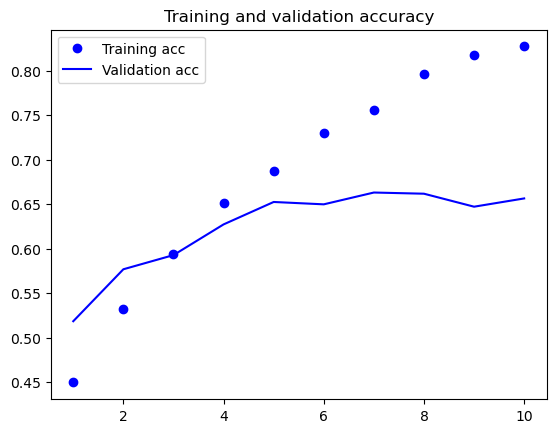

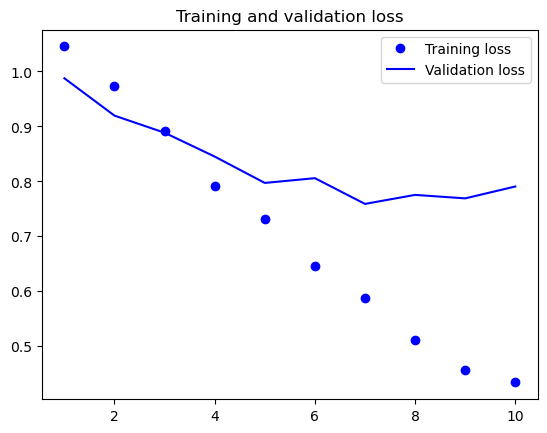

In [21]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
txt = ["Bad"]
seq = tokenizer.texts_to_sequences(txt)
padded = pad_sequences(seq, maxlen=max_len)
pred = model.predict(padded)
labels = ['positive', 'negative', 'neutral']
print(pred, labels[np.argmax(pred)])

1/1 [==============================] - 0s 104ms/step
[[0.1767646  0.46741042 0.355825  ]] negative


In [29]:
test = pd.read_csv('sampled2.csv')
test.head()

,Sentence,Sentiment
0,When TSLA was at 1K share price :\r\n\r\n8B sa...,positive
1,$TSLA will go down because you own the stock… ...,positive
2,TSLA 🚀🚀🚀🚀🚀🚀🚀,neutral
3,"&gt;What I mean is when I started investing, t...",positive
4,"I do trade in some ETFs.. DIV, SDIV ; USOI (it...",negative


In [30]:
sentence = test['Sentence'].tolist()
sentiment = test['Sentiment'].tolist()

In [31]:
i = 0
correct = 0
for i in range(len(sentence)):
    test = sentence[i]
    #print(test)
    test = tokenizer.texts_to_sequences(test)
    test = pad_sequences(test, maxlen = max_len, dtype = 'int32', value = 0)
    sentiment_t = model.predict(test)[0]
    
    
    actual = sentiment[i]
    if(np.argmax(sentiment_t) == 0):
        predicted = labels[0]
    elif(np.argmax(sentiment_t) == 1):
        predicted = labels[1]
    elif(np.argmax(sentiment_t) == 2):
        predicted = labels[2]
    
    if(predicted == actual):
        correct += 1

1/1 [==============================] - 0s 250ms/step


In [26]:
print("Number of correct predictions: ", correct)
print("Total predictions made: ", len(sentence))

Number of correct predictions:  40
Total predictions made:  99
